In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img
from keras.applications.xception import preprocess_input
import numpy as np
import tensorflow.lite as tflite

In [2]:
tf.__version__, keras.__version__

('2.17.0', '3.6.0')

In [3]:
model = keras.models.load_model('./xception_08_0.977.keras')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('xception_08_0.977.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/bn/9c310s5159z1mxbyfh61sxjr0000gn/T/tmp8gfwo3hg/assets


INFO:tensorflow:Assets written to: /var/folders/bn/9c310s5159z1mxbyfh61sxjr0000gn/T/tmp8gfwo3hg/assets


Saved artifact at '/var/folders/bn/9c310s5159z1mxbyfh61sxjr0000gn/T/tmp8gfwo3hg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name='input_layer_29')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  5990541968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5990651504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5990652560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5990542496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5990651328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5990688368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5990716512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5990717568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5990688896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5990716336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5990736640: Tenso

W0000 00:00:1736612113.440800 11265185 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1736612113.441155 11265185 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2025-01-11 17:15:13.441856: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/bn/9c310s5159z1mxbyfh61sxjr0000gn/T/tmp8gfwo3hg
2025-01-11 17:15:13.446350: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-01-11 17:15:13.446359: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/bn/9c310s5159z1mxbyfh61sxjr0000gn/T/tmp8gfwo3hg
2025-01-11 17:15:13.498748: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2025-01-11 17:15:13.508568: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-01-11 17:15:14.005916: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle a

In [4]:
interpreter = tflite.Interpreter(model_path='xception_08_0.977.tflite')
interpreter.allocate_tensors()

INFO: Initialized TensorFlow Lite runtime.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
INFO: XNNPack weight cache not enabled.
VERBOSE: Replacing 104 out of 104 node(s) with delegate (TfLiteXNNPackDelegate) node, yielding 1 partitions for the whole graph.
INFO: Successfully applied the default TensorFlow Lite delegate indexed at 0.
 *NOTE*: because a delegate has been applied, the precision of computations should be unchanged, but the exact output tensor values may have changed. If such output values are checked in your code, like in your tests etc., please consider increasing error tolerance for the check.


In [5]:
interpreter.get_input_details()

[{'name': 'serving_default_input_layer_29:0',
  'index': 0,
  'shape': array([  1, 299, 299,   3], dtype=int32),
  'shape_signature': array([ -1, 299, 299,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [6]:
input_index = interpreter.get_input_details()[0]['index']
input_index

0

In [7]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall_1:0',
  'index': 229,
  'shape': array([ 1, 10], dtype=int32),
  'shape_signature': array([-1, 10], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [8]:
output_index = interpreter.get_output_details()[0]['index']
output_index

229

In [9]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

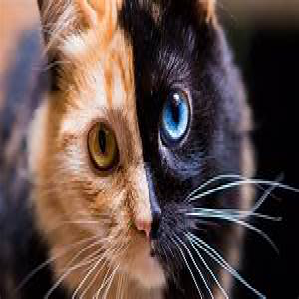

In [27]:
# url = 'https://raw.githubusercontent.com/vladflore/machine-learning-zoomcamp-cohort-2024/refs/heads/main/capstone1/dog.jpeg'
url = 'https://raw.githubusercontent.com/vladflore/machine-learning-zoomcamp-cohort-2024/refs/heads/main/capstone1/cat.jpeg'
img = download_image(url=url)
img = prepare_image(img, target_size=(299, 299))
img

In [15]:
def preprocess_input(x):
    print('Preprocessing input...')
    # x /= 127.5
    # x -= 1.
    x /= 255.0
    return x

In [28]:
img = download_image(url=url)
img = prepare_image(img, target_size=(299, 299))
x = np.array(img, dtype='float32')
X = np.array([x])
X = preprocess_input(X)
X.shape

Preprocessing input...


(1, 299, 299, 3)

In [29]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)
preds = model.predict(X)
preds[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


array([-0.9769825 , -2.5766778 , -2.061614  , -0.28166592, -0.54639673,
        8.103409  , -0.35372123, -0.5909124 , -2.298463  , -0.6293899 ],
      dtype=float32)

In [30]:
classes = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "scoiattolo": "squirrel",
    "dog": "cane",
    "elephant": "elefante",
    "butterfly": "farfalla",
    "chicken": "gallina",
    "cat": "gatto",
    "cow": "mucca",
    "spider": "ragno",
    "squirrel": "scoiattolo",
}

In [31]:
all = dict(zip(classes, preds[0]))
predicted_animal = max(all, key=all.get)
print(f'Predicted animal: {translate[predicted_animal]}')

Predicted animal: cat


In [32]:
!pip install keras-image-helper

In [34]:
from keras_image_helper import create_preprocessor
preprocessor = create_preprocessor('xception', target_size=(299, 299))
X = preprocessor.from_url(url)
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)
preds[0]

array([-1.0651    , -2.9695516 , -2.1990752 , -0.24612512, -0.49525332,
        8.466398  , -0.40652204, -0.6805266 , -2.7044487 , -0.36487436],
      dtype=float32)

In [35]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite-runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/


In [36]:
import tflite_runtime.interpreter as tflite
interpreter = tflite.Interpreter(model_path='xception_08_0.977.tflite')
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']
preprocessor = create_preprocessor('xception', target_size=(299, 299))
X = preprocessor.from_url(url)
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)
preds

array([[-1.0651008 , -2.969549  , -2.199073  , -0.24612437, -0.49525392,
         8.466399  , -0.40652198, -0.68052673, -2.7044463 , -0.36487642]],
      dtype=float32)

In [43]:
import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

from io import BytesIO
from urllib import request
from PIL import Image
import numpy as np

preprocessor = create_preprocessor('xception', target_size=(299, 299))
interpreter = tflite.Interpreter(model_path='xception_08_0.977.tflite')
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img

def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

def preprocess_input(x):
    x /= 255.0
    # x -= 1.
    return x

def read_img(url):
    img=download_image(url)
    img=prepare_image(img,(299,299))
    x = np.array(img, dtype='float32')
    X = np.array([x])
    X = preprocess_input(X)
    return X


def predict(url):
    X = preprocessor.from_url(url)
    # X = read_img(url)
    interpreter.set_tensor(input_index, X)
    interpreter.invoke()
    preds = interpreter.get_tensor(output_index)
    return preds[0]

def lambda_handler(event, context):
    url = event['url']
    return predict(url)


In [53]:
dog_url = 'https://raw.githubusercontent.com/vladflore/machine-learning-zoomcamp-cohort-2024/refs/heads/main/capstone1/dog.jpeg'
cat_url = 'https://raw.githubusercontent.com/vladflore/machine-learning-zoomcamp-cohort-2024/refs/heads/main/capstone1/cat.jpeg'
butterfly_url = 'https://raw.githubusercontent.com/vladflore/machine-learning-zoomcamp-cohort-2024/refs/heads/main/capstone1/butterfly.jpeg'
event = {
    'url': butterfly_url
}
preds = lambda_handler(event, None)
all = dict(zip(classes, preds))
predicted_animal = max(all, key=all.get)
print(f'Predicted animal: {translate[predicted_animal]}')

Predicted animal: butterfly
